# COMP90016 - Assignment 3
Version 1.3 Last edited 08/05/2023.


In [83]:
### Fill in your student details here
NAME = "Arya Araban"

ID = "1439683"

In [84]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Semester 1, 2023

This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism.

Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of utilising computational genomics tools, writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 


### Completing code cells

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

- You will see the following text in graded code cells:

``` python
# YOUR CODE HERE
raise NotImplementedError()
```

- ***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***


- Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

- Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to thtest cases that are included in this document.

- Include code comments in your solutions. Well commented code can help you to receive partial marks even if the final solution is incorrect. 


### Completing written questions

Short answer questions will be followed by a solution cell that looks like this:

`-- GRADED CELL (5 marks) - complete this cell --`

`YOUR ANSWER HERE`

- Only put your responses in these cells.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.



### Editing the notebook

**Only** graded cells will be marked.
- Don't enter solutions outside of graded cells
- Do **NOT** duplicate or remove cells from the notebook
- You may add new cells to test code, but new cells will not be graded.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.


### Marks

No marks are allocated to commenting in your code. We do however, encourage efficient and well commented code.

The total marks for the assignment add up to 100, and it will be worth 15% of your overall subject grade.

Part 1: 25 marks

Part 2: 40 marks

Part 3: 35 marks

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID at the top of this notebook.


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**

## Overview

In this assignment, you will answer questions about workflows, phylogenetics and and genome annotation.

You will use the `biopython` library in your functions. You may want to refer to sections of the documentation for additional help. Additional to `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in COMP90016 including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.

# Setup

In [85]:
import os
import requests
from IPython.core.display import HTML

# Handy function to fetch our data files
def fetch_file(url, outpath='.'):
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        # Get the filename from the URL
        filename = os.path.basename(url).split('?', 1)[0]
        # Construct the filepath using the specified directory and filename
        filepath = os.path.join(outpath, filename)
        # Create the directory if it doesn't exist
        if not os.path.exists(outpath):
            print(f'Creating output dir: {outpath}')
            os.makedirs(outpath)
        # Check if the file already exists in the specified directory
        if os.path.exists(filepath):
            print(f'{filename} already exists in {outpath}')
        else:
            with open(filepath, 'wb') as f:
                f.write(response.content)
                f.close()
            print(f'Saved to: {filepath}')
    else:
        print('File not found')

In [86]:
# Make the notebook pretty
HTML(requests.get('https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/main/data/2023/style/custom.css').text)

In [87]:
# Fetch assignment data
f_names = ["comp90016_assignment_3_tree.nwk",
          "comp90016_assignment_3_assembly.fasta.gz",
          "comp90016_assignment_3_B_luteolus.gff"]

for filename in f_names:     
    url = f'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2023/Assignment_03/data/{filename}?raw=true'
    fetch_file(url,outpath='data')
    
  

File found!
comp90016_assignment_3_tree.nwk already exists in data
File found!
comp90016_assignment_3_assembly.fasta.gz already exists in data
File found!
comp90016_assignment_3_B_luteolus.gff already exists in data


## Part 1: Workflows

### Questions
In the cells below, complete the following tasks:

### Question 1.1 

(15 marks, max 200 words)

<div class="alert alert-info">

Describe a workflow that could be used to call germline SNVs and indels from short (Illumina) reads. The starting data consist of FASTQ files containing paired-end Illumina reads from DNA for 100 human patients with a rare disease. The FASTQ files each contain a readset for an individual patient. 
- Justify why you have chosen to include each step of your workflow. 
- Include a quality control step. 
- Include the names of the tools you propose to use and the specific inputs and outputs of each step. 
- Please use tools that have been used or mentioned in COMP90016 this semester. 
- Explain the filters you would use to filter the variants so that the number of false positive calls is minimised. 
- The output of the proposed workflow should be a VCF file. 
- Choose an appropriate workflow language for your workflow and provide one reason for your choice.
    
</div>




-- GRADED CELL (15 marks) - complete this cell --

Quality control: Use FastQC for quality control of reads to ensure adequate quality. Then, trim reads using Python to remove low-quality bases and adapter sequences. (input: FASTQ -- output: HTML)

Read alignment: Align the reads to the reference genome using SAMtools. (input: FASTQ -- output: BAM)

Sorting and indexing: Sort and index the BAM file using SAMtools to prepare it for downstream analysis. (input: BAM -- output: BAM)

Mark duplicates: Mark duplicate reads using SAMtools to remove PCR duplicates.(input: BAM -- output: BAM)

Variant calling: Call variants using SAMtools. (input: BAM -- output: VCF)

Variant filtering: Filter the variants using Pandas based on quality score, allele frequency, etc.. to minimize false positive calls. (input: VCF -- output: VCF)

The workflow language used to implement this workflow could be Nextflow, which allows for easy parallelization of tasks and efficient handling of large datasets.

Overall, this workflow is justified because it provides a standard and reliable approach for detecting germline variants using Illumina short-read sequencing data. The quality control step ensures that only high-quality reads are used for downstream analysis, while the read alignment and variant calling steps accurately identify variants. The variant filtering step helps to minimize false positive calls, which is crucial for clinical applications.

### Question 1.2 

(10 marks, max 100 words)

<div class="alert alert-info">

Describe the kinds of parallelism that could be used with your workflow. 
    
</div>




-- GRADED CELL (10 marks) - complete this cell --

Parallelism can be used in the given workflow to increase its efficiency and processing speed. 

Nextflow provides various methods for implementing parallel processing, such as parallel processing of multiple samples, parallel processing of different tasks, parallel processing of different regions of the genome, and parallel processing of different parameters. For example, the read alignment and variant calling steps can be parallelized by splitting the data into smaller chunks and processing them in parallel.

By utilizing parallelism, the workflow can be optimized for scalability, throughput, and processing speed, depending on the specific needs and constraints of the analysis. 


## Part 2: Phylogenetics

### Setup

The questions in part two relate to [this 2021 paper](https://www.sciencedirect.com/science/article/abs/pii/S1055790321001147)  

>Esquerré, D., Donnellan, S. C., Pavón-Vázquez, C. J., Fenker, J. & Keogh, J. S. Phylogeography, historical demography and systematics of the world’s smallest pythons (Pythonidae, Antaresia). Molecular Phylogenetics and Evolution 161, 107181 (2021).

We will also be using `biopython` to read in phlogenetic trees as `Newick.Tree` objects.

In [88]:
from Bio import Phylo

The Newick file we will be using includes a phylogenetic tree of the mitochondrial cytochrome b genes from a subset of the  *Antaresia* samples. 

In [89]:
# Import the gene tree.
cyt_b_tree = Phylo.read("data/comp90016_assignment_3_tree.nwk", "newick")
cyt_b_tree.root_at_midpoint()

# Note: You can visualise this phylogeny at http://etetoolkit.org/treeview/

### Questions
In the cells below, complete the following tasks:

### Question 2.1 

(5 marks, max 50 words)

<div class="alert alert-info">
    
Suggest why *Morelia bredli* was used as an outgroup in the phylogenetic analyses. 

</div>


-- GRADED CELL (5 marks) - complete this cell --

Morelia bredli was used as an outgroup in the phylogenetic analyses because it is a closely related but distinct python species that can help to root the phylogenetic tree and determine the evolutionary relationships among the Antaresia species and populations.

### Question 2.2 

(5 marks, max 50 words)

<div class="alert alert-info">
Suggest why the mitochondrial cytochrome b gene was selected for the analysis. 
</div>


-- GRADED CELL (5 marks) - complete this cell --

The mitochondrial cytochrome b gene was chosen for its high variation among organisms, aiding in inferring phylogenetic relationships and evolutionary history among closely related python species and populations, including divergence times and gene flow patterns.

### Question 2.3 

(5 marks, max 100 words)

<div class="alert alert-info">
Suggest why monomorphic SNPs and SNPs with low read depth were removed. 
</div>


-- GRADED CELL (5 marks) - complete this cell --

To ensure the accuracy and reliability of the phylogenetic analysis, monomorphic SNPs and SNPs with low read depth were removed. Monomorphic SNPs only have one allele in the entire dataset causing lack of variation between individuals, thus providing no information about their relationships. SNPs with low read depth may be unreliable due to sequencing errors. Removing these SNPs allowed the researchers to focus on informative and reliable SNPs.

### Question 2.4 

(5 marks, max 100 words)

<div class="alert alert-info">
    
`IQ-tree` was used for treebuilding with the cytochrome b sequences. Many computational genomics tools including `IQ-tree` use algorithms that are not deterministic; they can produce different outputs on repeated runs with the same input. 

Explain why this is a challenge for reproducibility and how this can be addressed by users. 

</div>


-- GRADED CELL (5 marks) - complete this cell --

Non-deterministic algorithms like IQ-tree can produce different outputs for the same input, posing a challenge for reproducibility. This affects the consistency and reliability of results, depending on factors like the order of data, random seed, or hardware used. To address this, users can set a fixed random seed, control sources of randomness, document hardware and software specifications, create reproducible environments using tools like Docker or Conda, and specify dependencies in a portable and structured way using workflow languages like WDL or CWL.

### Question 2.5 

(10 marks, max 1 min run-time)

Colless’ imbalance ($I_{c}$) is a metric that relates to the shape (or balance) of phylogenetic trees. It is calculated according to the following formula:


# <center>$I_{c}=\frac{ \sum_{InteriorNodes} |T_{R}-T_{L}| }{ \frac{(n-1)(n-2)}{2} }$</center>

Where: 
* $T_{R}$ and $T_{L}$ are the number of taxa descended from the right and left branches respectively, of an interior node. 
* The interior nodes are all nodes (including the root) that are not tips. 
* *n* is the total number of taxa in the tree (including tips). 
* *(n-1)(n-2)/2* is the maximum possible value of the numerator, therefore the value of $I_{c}$ ranges from 0 to 1.

<div class="alert alert-success">
Write a Python function to calculate the Colless’ imbalance of a phylogenetic tree. 
    
- [ ] Assume tree is a Newick.Tree object containing a rooted binary tree. 
- [ ] Assume every node in tree has either 0 children or 2 children. 
- [ ] Return a floating-point number. 
- [ ] If tree contains fewer than 3 nodes, return None.
</div>

In [90]:
# GRADED CELL 2.5 (10 marks, max 1 min run-time)

def colless_imbalance(tree):
    """
    Calculate the Colless imbalance of a phylogenetic tree.
    Assume tree is a Newick.Tree object containing a rooted binary tree.
    Assume every node in tree has a unique name and has either 0 children or 2 children.
    Return a floating-point number.
    If tree contains fewer than 3 nodes, return None.
    """
    n = len(tree.get_terminals()) + len(list(filter(lambda x: not x.is_terminal(), tree.find_clades())))

    if n < 3:
        return None

    imbalance = 0

    for node in tree.find_clades(order="level"):
        if not node.is_terminal():
            tr_tree = node.clades[1]
            tl_tree = node.clades[0]
            
            tr = len(list(tr_tree.get_terminals())) + len(list(filter(lambda x: not x.is_terminal(), tr_tree.find_clades())))
            tl = len(list(tl_tree.get_terminals())) + len(list(filter(lambda x: not x.is_terminal(), tl_tree.find_clades())))

            imbalance += abs(tr - tl)

    max_imbalance = (n - 1) * (n - 2) / 2
    return imbalance / max_imbalance


demo_tree_a


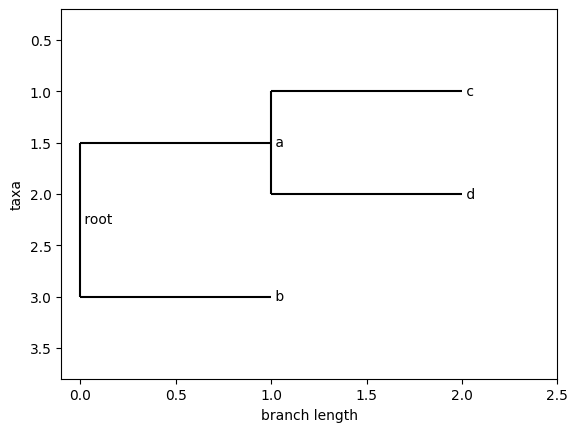

This tree has 5 taxa (including root) and 2 internal nodes.

Colless Imbalance for demo_tree_a is: 0.3333333333333333
139 µs ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [91]:
# Test your function in this cell

# Create a demo tree
from io import StringIO
demo_tree_a = Phylo.read(StringIO("((c,d)a,b)root;"), "newick")

# Inspect the tree
print("demo_tree_a")
Phylo.draw(demo_tree_a)
print("This tree has 5 taxa (including root) and 2 internal nodes.\n")

# Check expected output on demo data
print(f'Colless Imbalance for demo_tree_a is: {colless_imbalance(demo_tree_a)}') # Should output 0.3333...

# Test the function run time
%timeit colless_imbalance(demo_tree_a) 

# Write your own tests here:

In [92]:
# --- AUTOGRADING CELL DO NOT EDIT ----


### Question 2.6 

(10 marks, max 1 min run-time)

A phylogenetic tree can be stored in Newick format in several non-unique arrangements. Aside from topology, Newick files can also store branch length and branch support information. 

<div class="alert alert-success">
Write a Python function that determines whether a group of phylogenetic trees has a common, identical topology. 

- [ ] Assume tree_list is a list of Newick.Tree objects. 
- [ ] Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
- [ ] Return the Boolean value True if all the trees in tree_list share an identical topology. 
- [ ] Return the Boolean value False if they do not. 
- [ ] If tree_list contains fewer than 2 Newick.Tree objects, return None. 
</div>

In [93]:
# GRADED CELL 2.6 (10 marks, max 1 min run-time)

# Optional import
from itertools import combinations

def common_topology(tree_list):
    """
    Determine whether a group of phylogenetic trees has a common, identical topology. 
    Assume tree_list is a list of Newick.Tree objects. 
    Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
    Return the Boolean value True if all the trees in tree_list share an identical topology.
    Return the Boolean value False if they do not.
    If tree_list contains fewer than 2 Newick.Tree objects, return None.
    """
    if len(tree_list) < 2:
        return None
    
    def get_tree_structure(tree):
        def get_structure_recursive(clade):

            if clade.is_terminal():
                return str(clade)
            else:
                return tuple(get_structure_recursive(child) for child in sorted(clade, key=lambda x: str(x)))
                
        return get_structure_recursive(tree.root)
    
    tree_structures = [get_tree_structure(tree) for tree in tree_list]
    
    first_tree_structure = tree_structures[0] # we wont use itertools since less effecient. 
    for i in range(1,len(tree_structures)):
        cur_tree_structure = tree_structures[i]
        if first_tree_structure != cur_tree_structure:
            return False
            
    return True

demo_tree_a


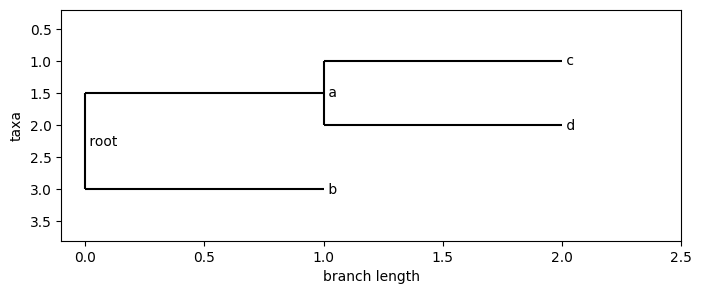

demo_tree_b


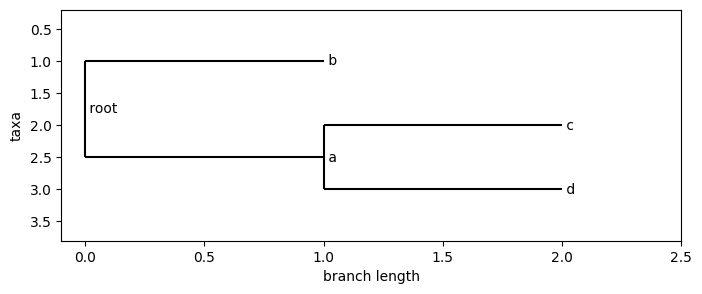

demo_tree_c


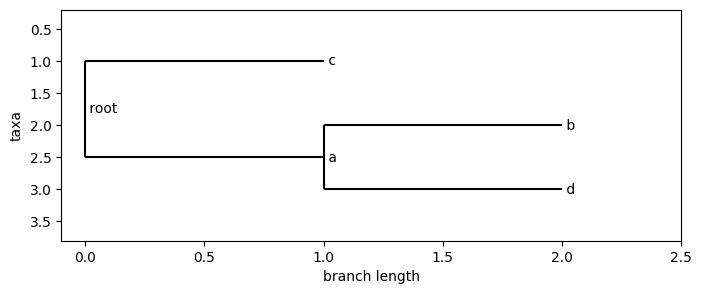

True
False
15.3 µs ± 7.91 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [94]:
# Test your function in this cell

# Create some more demo trees
demo_tree_b = Phylo.read(StringIO("(b,(c,d)a)root;"), "newick")
demo_tree_c = Phylo.read(StringIO("(c,(b,d)a)root;"), "newick")

# Inspect the trees
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3)

print("demo_tree_a")
Phylo.draw(demo_tree_a)

print("demo_tree_b")
Phylo.draw(demo_tree_b)

print("demo_tree_c")
Phylo.draw(demo_tree_c)

# Check expected output on demo data
print(common_topology([demo_tree_a, demo_tree_b])) # should output True
print(common_topology([demo_tree_a, demo_tree_c])) # should output False

# Test the function run time
%timeit common_topology([demo_tree_a, demo_tree_b])

# Write your own tests here:


In [95]:
# --- AUTOGRADING CELL DO NOT EDIT ----


## Part 3: Genome annotation

### Setup

Some organisms use different variations of the genetic code. This must be taken into account when annotating a genome. You can see the differences in the alternative genetic codes at the site below. Note that some genetic codes have multiple initiation codons, some are more commonly used than others. The first amino acid of any coding sequence is always methionine, even when an alternative initiation codon is used. In any other position, that codon may encode a different amino acid but, as a start codon, it will always code for methionine.

>https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi 

These genetic codes can be referred to by a number. For example, the standard genetic code is genetic code 1.

Fortunately, some `biopython` functions can interpret alternate genetic codes.

The [CodonTable](https://biopython.org/docs/1.75/api/Bio.Data.CodonTable.html)
 module can also be used to help you incorporate the genetic codes into your functions. 


In [96]:
import Bio.Data.CodonTable
from Bio.Data.CodonTable import register_ncbi_table


# Display the standard genetic code. Try changing the number to view a different code.
print(Bio.Data.CodonTable.generic_by_id[1])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

We can use the integer id to to access different attributes for each codon table, such as species `names` or `protein_alphabet`.

In [97]:
Bio.Data.CodonTable.generic_by_id[9]

NCBICodonTable(id=9, names=['Echinoderm Mitochondrial', 'Flatworm Mitochondrial', 'SGC8'], ...)

In [98]:
Bio.Data.CodonTable.generic_by_id[9].protein_alphabet

'ACDEFGHIKLMNPQRSTVWY'

And we can specific a codon table when translating DNA sequences.

In [99]:
from Bio.Seq import Seq
dna_test = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
dna_test.translate(table=9)

Seq('MAIVMGRWKGAR*')

<br>

Now, we read in a read set from the `comp90016_assignment_3_assembly.fasta.gz` file. 

Note that converting a readset into a list of `biopython` objects makes it easier to handle. We also convert our SeqRecord objects into Seq objects in preparation for the next task.

In [100]:
import gzip
from Bio import SeqIO
from Bio.Seq import Seq

In [101]:
fname = 'data/comp90016_assignment_3_assembly.fasta.gz'

# Our fasta file is compressed using gzip. 
# We must open it before SeqIO can read the contents
with gzip.open(fname, "rt") as handle:
    fasta_sequences = list(SeqIO.parse(handle, "fasta"))
    
# We only want the Bio.Seq.Seq objects
assembly_contigs = [SeqRecord.seq for SeqRecord in fasta_sequences]
assembly_contigs

[Seq('CCCTTCCCCGGGAATTAATCGAGTCCTCTTTCATATCACACGGATGGGGACCTA...CCG'),
 Seq('AGATCTTTGCTCACGCGTCTAGTCGGCCCACGCTTGGTTTTTAAGATCCAATGA...AGG'),
 Seq('GCCTAATCTGACCGTTTTAGATACGGCACTGTGGGCAATACGAGGTAATGGCAG...TTG')]

### Questions
In the cells below, complete the following tasks:

### Question 3.1 

(15 marks, max 1 min run-time)

Many genome annotation tools predict coding sequences (CDSs) by detecting start and stop codons. In this question, a CDS is defined as a continuous sequence of DNA that begins with a start codon and ends in an in-frame stop codon. A CDS must not have an in-frame stop codon in the middle, only at the end. CDSs can be in any reading frame on the positive or negative strand, can be overlapping or can be nested within another CDS.

<div class="alert alert-success">
    
Write a Python function to annotate a DNA sequence assembly with CDSs. 
- [ ] Assume assembly is a list of Bio.Seq.Seq  objects representing the contigs of an assembly. 
- [ ] Assume genetic_code is an integer between 1 and 6. 
- [ ] Assume min_len is an integer.
- [ ] Use the genetic code encoded by genetic_code.
- [ ] Assume CDSs can start with any of the initiation codons and finish with any of the stop codons specified in the genetic code. 
- [ ] Assume min_len is an integer. 
- [ ] Only consider CDSs wholly contained within a contig (including the start and stop codons). 
- [ ] Only consider CDSs that are equal to or longer than min_len bases. 
- [ ] If assembly is an empty list, return None. 
- [ ] If no CDSs are found, return an empty Pandas dataframe. 
- [ ] Return a Pandas dataframe following this GTF-like specification. 
    - Include one row for every CDS identified. 
    - Include the following labelled columns: seqname, source, feature, start, end, strand, frame 
    - Set seqname to the string “contig_x”, where x is an integer representing the position of the contig in assembly. The first contig would have the seqname “contig_1”.
    - Set source to the string “y_CDS_annotator”, where y your student number. 
    - Set feature to the string “predicted_CDS”
    - Set start to an integer representing the 1-based index of the first base of the start codon in the contig. 
    - Set end to an integer representing the 1-based index of the final base of the stop codon in the contig. 
    - Set strand to the string “+” if the CDS is on the positive strand and “–“ if the string is on the negative strand. 
    - Set frame to the integer representing the reading frame, either 0, 1 or 2. The integer represents the number of bases offset from the start of the strand.
    - Note that the start, end and frame of an CDS on the negative strand is counted from the 5' end of the negative strand.
</div>

In [102]:
# GRADED CELL 3.1 (15 marks, max 1 min run-time)

from collections import defaultdict
import pandas as pd

def annotate_CDSs(assembly, min_len, genetic_code):
    """
    Write a Python function to annotate a DNA sequence assembly with CDSs. 
    Assume assembly is a list of Bio.Seq.Seq objects representing the contigs of an assembly. 
    Assume genetic_code is an integer corresponding to a valid codon table, use this genetic code to translate the input DNA.
    Assume min_len is an integer.
    Assume CDSs can start with any of the start codons specified in the genetic code.
    Assume CDSs can stop with any of the stop codons specified in the genetic code (stop will always encode "*").
    Only consider CDSs wholly contained within a contig (including the start and stop codons). 
    Only consider CDSs that are equal to or longer than min_len bases. 
    If assembly is an empty list, return None. 
    If no CDSs are found, return an empty Pandas dataframe. 
    Return a Pandas dataframe following this GTF-like specification. 
        - Include one row for every CDS identified. 
        - Include the following labelled columns: seqname, source, feature, start, end, strand, frame 
        - Set seqname to the string “contig_x”, where x is an integer representing the position of the contig in assembly. The first contig would have the seqname “contig_1”.
        - Set source to the string “y_CDS_annotator”, where y your student number. 
        - Set feature to the string “predicted_CDS”
        - Set start to an integer representing the 1-based index of the first base of the start codon in the contig. 
        - Set end to an integer representing the 1-based index of the final base of the stop codon in the contig. 
        - Set strand to the string “+” if the CDS is on the positive strand and “–“ if the string is on the negative strand. 
        - Set frame to the integer representing the reading frame, either 0, 1 or 2. The integer represents the number of bases offset from the start of the strand.
        - Note that the start, end and frame of an CDS on the negative strand is counted from the 5' end of the negative strand.
    """
    if not assembly:
        return None

    cds_list = []

    for idx, seq in enumerate(assembly, start=1):
        for strand, dna_seq in [(1, seq), (-1, seq.reverse_complement())]: #either positive or negative strand
            for frame in range(3):
                for i in range(frame, len(dna_seq), 3):
                    codon = dna_seq[i:i+3]
                    if (codon in Bio.Data.CodonTable.generic_by_id[genetic_code].start_codons) and (i + min_len <= len(dna_seq)):
                        for j in range(i + 3, len(dna_seq), 3):
                            next_codon = dna_seq[j:j+3]
                            if next_codon in Bio.Data.CodonTable.generic_by_id[genetic_code].stop_codons:
                                if j + 3 - i >= min_len:
                                    cds_list.append({
                                        'seqname': f"contig_{idx}",
                                        'source': f"{ID}_CDS_annotator",
                                        'feature': 'predicted_CDS',
                                        'start': i + 1,
                                        'end': j + 3,
                                        'strand': '+' if strand == 1 else '-',
                                        'frame': frame
                                    })
                                break

    return pd.DataFrame(cds_list)


In [103]:
# Test your function in this cell

demo_assembly = [Seq("TCTTTCATGAATCCAAC"), Seq("ATGAAATGAATGTCTTGA")]

print(annotate_CDSs(demo_assembly, 12, 1)) # should identify a single CDS in contig_1, start = 2, end = 13, strand = -, frame = 1
print("\n")
print(annotate_CDSs(demo_assembly, 12, 2)) # should identify a single CDS in contig_1, start = 6, end = 17, strand = -, frame = 2
print("\n")
print(annotate_CDSs(assembly_contigs, 180, 1))


# Write your own tests here:


    seqname                 source        feature  start  end strand  frame
0  contig_1  1439683_CDS_annotator  predicted_CDS      2   13      -      1


    seqname                 source        feature  start  end strand  frame
0  contig_1  1439683_CDS_annotator  predicted_CDS      6   17      -      2


     seqname                 source        feature  start  end strand  frame
0   contig_1  1439683_CDS_annotator  predicted_CDS    487  756      -      0
1   contig_1  1439683_CDS_annotator  predicted_CDS    547  756      -      0
2   contig_1  1439683_CDS_annotator  predicted_CDS    568  756      -      0
3   contig_2  1439683_CDS_annotator  predicted_CDS    422  610      +      1
4   contig_2  1439683_CDS_annotator  predicted_CDS     51  260      +      2
5   contig_2  1439683_CDS_annotator  predicted_CDS     66  260      +      2
6   contig_2  1439683_CDS_annotator  predicted_CDS    428  634      -      1
7   contig_2  1439683_CDS_annotator  predicted_CDS     69  311      -      2

In [104]:
# --- AUTOGRADING CELL DO NOT EDIT ----

# Get testing data
f_names = ["comp90016_assignment_3_assembly_contigs_output.csv",
           "comp90016_assignment_3_test.fastq",
           "comp90016_assignment_3_test_output.csv"]

for filename in f_names:     
    url = f'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2023/Assignment_03/data/testing/{filename}?raw=true'
    fetch_file(url,outpath='data/testing')

from collections import defaultdict
import pandas as pd
import numpy as np

test_output_one = annotate_CDSs(demo_assembly, 12, 1)
test_output_two = annotate_CDSs(demo_assembly, 12, 2)
test_output_three = annotate_CDSs(assembly_contigs, 180, 1)


File not found
File not found
File not found


### Question 3.2 

(5 marks, max 100 words)

<div class="alert alert-info">
Is annotating CDSs in a genome assembly a good candidate use-case for data parallelism? Explain your answer. 
</div>


-- GRADED CELL (5 marks) - complete this cell --

Yes, Annotating CDSs in a genome assembly is a suitable application for data parallelism, as this task can be executed independently for each contig in the assembly. By breaking the assembly into smaller subsets of contigs, each subset can be processed by a separate worker in parallel, leading to a considerable acceleration in the annotation process, especially for larger assemblies with numerous contigs. Furthermore, since the communication between workers is minimal (only the final results need to be combined), the overhead of parallelization is low.

### Question 3.3 

(10 marks, max 100 words)

<div class="alert alert-info">
A researcher aims to identify genes in an assembly of a newly discovered species that does not have a reference genome. Aside from start and stop codons, explain what other features are useful for gene prediction. Describe what information could be used to differentiate genes from pseudogenes.
</div>


-- GRADED CELL (5 marks) - complete this cell --

other useful features include Splice sites, promoter regions, and conserved gene sequences. Splice sites mark exon-intron boundaries and can help identify the structure of a gene, promoter regions regulate gene expression and help locate genes, and conserved gene sequences aid in identifying homologous genes. To distinguish genes from pseudogenes, researchers can look for evidence of transcription or translation, such as mRNA or protein products. Pseudogenes lack functional mRNA or protein products due to mutations or other disruptions in their sequence.

### Question 3.4

(5 marks, max 1 min run-time)

You have been provided with a genome annotation file from the species *Bacillus luteolus*: `comp90016_assignment_3_B_luteolus.gff`

<div class="alert alert-success">
    
Write Python code to produce two parallel boxplots, one of the length distribution of genes and one of the length distribution of tRNAs in the *Bacillus luteolus* genome. 
    
- [ ] Assume genes have the type "gene" and tRNAs have the type "tRNA". 
- [ ] The length of a feature is defined as the start position subtracted from the end position. 
- [ ] The plot should be produced inline, in the Jupyter notebook. 
- [ ] Your boxplots should share a scale. 
- [ ] Label both axes appropriately.
</div>

Your code does not have to include a function.


In [105]:
# Here's some Jupyter magic to render plots in the notebook
%matplotlib inline

# You may want to import some additional packages for building and formatting your plot (non-essential)
# Un-comment as reqired
import numpy as np
import matplotlib.pyplot as plt
#import seaborn
from collections import Counter

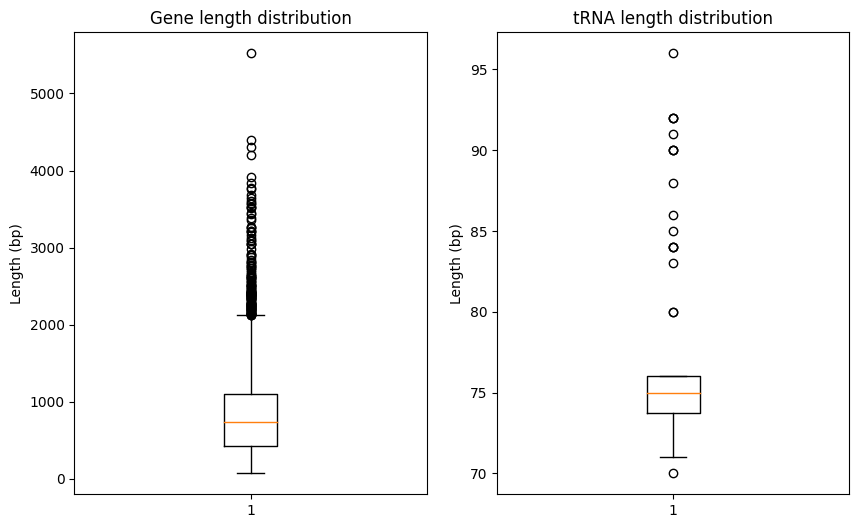

In [106]:
# GRADED CELL 3.4 (5 marks, max 1 min run-time)

# Use this cell to make your plot.



df = pd.read_csv('data/comp90016_assignment_3_B_luteolus.gff', sep='\t', header=None, comment='#')
df.columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']


df['length'] = df['end'] - df['start'] # length of each feature 

# Filter the dataframe by type: gene or tRNA
gene_df = df[df["type"] == "gene"]
trna_df = df[df["type"] == "tRNA"]

# Plot two boxplots side by side, sharing the same y-axis scale
plt.figure(figsize=(10, 6)) 

plt.subplot(1, 2, 1) 
plt.boxplot(gene_df["length"]) 
plt.title("Gene length distribution")
plt.ylabel("Length (bp)") 

plt.subplot(1, 2, 2) 
plt.boxplot(trna_df["length"]) 
plt.title("tRNA length distribution") 
plt.ylabel("Length (bp)") 

plt.show() 

# END OF ASSIGNMENT

## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared (see step 3).


Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**